In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import time
import itertools

### Modified dataset + Isolation Forest

In [7]:
# df_data_original = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df_data_scaled = pd.read_csv('/kaggle/input/dataset11/data_scaled.csv')
df_data_scaled.describe()

df_class = df_data_scaled['Class']

df_att = df_data_scaled.drop(['Class'], axis = 1)
# df_att = df_data_original
df_att.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [8]:
from sklearn.model_selection import train_test_split
X = df_att
y = df_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
df_data_scaled[df_data_scaled['Class'] == 1].head(10)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.307413,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,7.084469,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,3.045204,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.517013,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
6331,-0.293440,-0.906566,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1
6334,-0.293440,-0.906460,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,...,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1
6336,-0.293440,-0.906366,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,...,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1
6338,-0.293440,-0.906272,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,...,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1
6427,-0.293440,-0.905579,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1


In [8]:
# xy_train = pd.concat([X_train, y_train],axis = 1)
# xy_train[xy_train['Time'] == 472]

In [21]:
from sklearn.ensemble import IsolationForest
# isf = IsolationForest(contamination=0.00171, n_estimators=1000)
isf = IsolationForest(random_state=42)

isf.fit(X_train)

IsolationForest(random_state=42)

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
results = pd.Series(isf.predict(X_train))
results_train = results.map({1:0, -1:1})
results_train.value_counts()

0    219980
1      7865
dtype: int64

[[0.9668588  0.0331412 ]
 [0.17005076 0.82994924]]


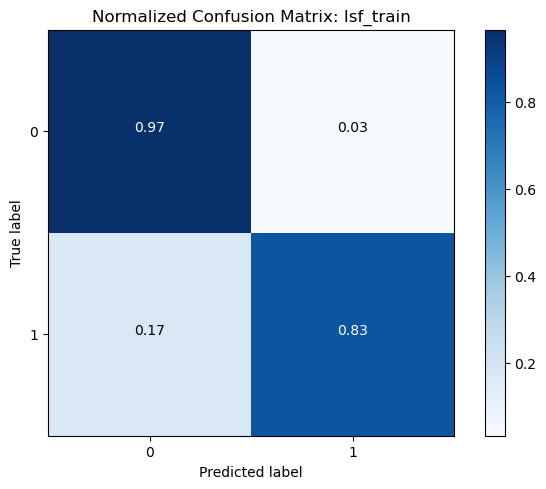

In [24]:
plot_confusion_matrix(confusion_matrix(y_train,results_train),classes=['0','1'], normalize = True, 
                      title='Normalized Confusion Matrix: Isf_train')

In [25]:
results = pd.Series(isf.predict(X_test))
results_test = results.map({1:0, -1:1})
results_test.value_counts()

0    54960
1     2002
dtype: int64

In [31]:
results.value_counts()

 1    54960
-1     2002
dtype: int64

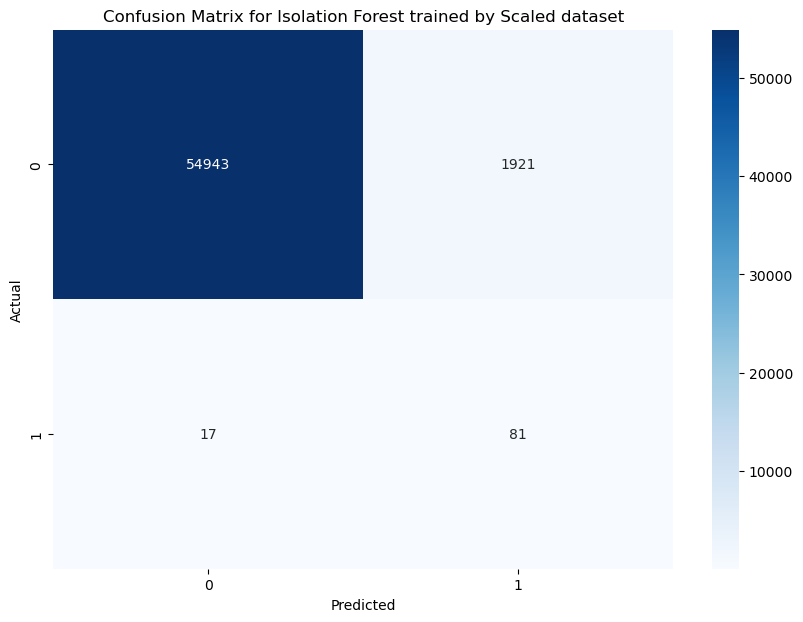

In [33]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, results_test)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Isolation Forest trained by Scaled dataset')
plt.show()

### Original dataset + Isolation Forest

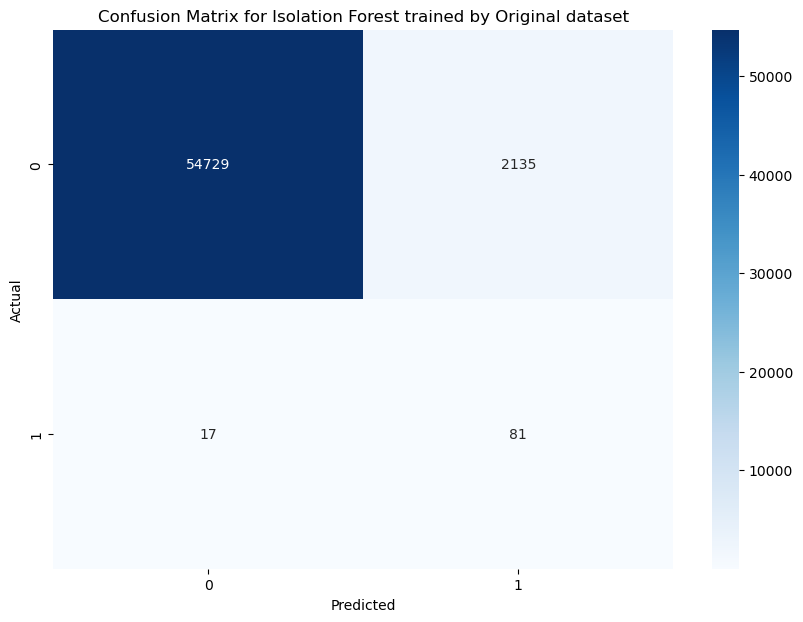

In [35]:
from sklearn.model_selection import train_test_split
df_data_original = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df_class = df_data_original['Class']

df_att = df_data_original.drop(['Class'], axis = 1)
# df_att = df_data_original
df_att.head()

X = df_att
y = df_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_data_scaled[df_data_scaled['Class'] == 1].head(10)

from sklearn.ensemble import IsolationForest
# isf = IsolationForest(contamination=0.00171, n_estimators=1000)
isf = IsolationForest(random_state=42)

isf.fit(X_train)

results = pd.Series(isf.predict(X_test))
results_test = results.map({1:0, -1:1})
results_test.value_counts()

import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, results_test)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Isolation Forest trained by Original dataset')
plt.show()

## Local outlier factor

In [15]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
lof.fit(X_train)

LocalOutlierFactor()

In [16]:
results = pd.Series(lof.predict(X_train))
results_train = results.map({1:0, -1:1})
results_train.value_counts()
plot_confusion_matrix(confusion_matrix(y_train,results_train),classes=['0','1'], normalize = True, 
                      title='Normalized Confusion Matrix: lof_train')

AttributeError: predict is not available when novelty=False, use fit_predict if you want to predict on training data. Use novelty=True if you want to use LOF for novelty detection and predict on new unseen data.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


[[0.95121694 0.04878306]
 [0.7755102  0.2244898 ]]


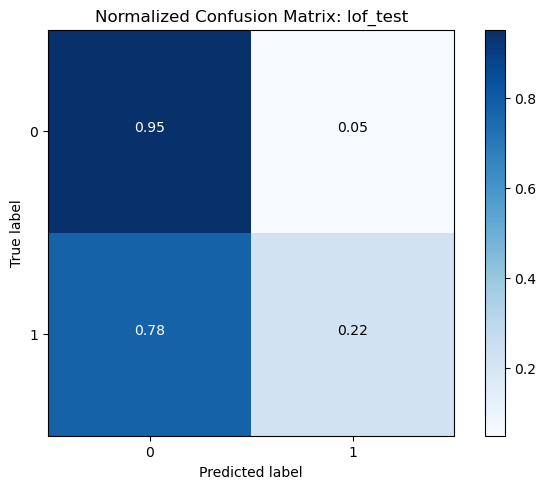

In [11]:
results = pd.Series(lof.predict(X_test))
results_test = results.map({1:0, -1:1})
results_test.value_counts()
plot_confusion_matrix(confusion_matrix(y_test,results_test),classes=['0','1'], normalize = True, 
                      title='Normalized Confusion Matrix: lof_test')

## Auto-encoder

In [18]:
df_train = pd.read_csv('/kaggle/input/dataset11/data_train.csv')
df_test = pd.read_csv('/kaggle/input/dataset11/data_test.csv')

df_train.columns = map(str.lower, df_train.columns)
df_train.rename(columns={'class': 'label', 'scaled_amount': 'v29', 'scaled_time': 'v30'}, inplace=True)
df_train.head()
df_train_normal = df_train[df_train['label'] == 0].drop('label', axis = 1)
df_train_fraud = df_train[df_train['label'] == 1]

df_test.columns = map(str.lower, df_test.columns)
df_test.rename(columns={'class': 'label', 'scaled_amount': 'v29', 'scaled_time': 'v30'}, inplace=True)
df_test.head()
X_test, y_test = df_test.drop('label', axis=1).values, df_test.label.values

In [19]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=42).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')
    
    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Fraud'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Clean'
    )
    
    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;

In [ ]:
features, labels = df_train.drop('label', axis=1).values, df_train.label.values
tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_validate = train_test_split(df_train_normal, test_size=0.2, random_state=42)


In [45]:
import tensorflow as tf
# data dimensions // hyperparameters 
input_dim = X_train.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])


# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                930       
                                                                 
 dense_37 (Dense)            (None, 16)                496       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
 dense_40 (Dense)            (None, 2)                 10        
                                                                 
 dense_41 (Dense)            (None, 4)                 12        
                                                                 
 dense_42 (Dense)            (None, 8)                

In [46]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]


In [50]:
X_train.shape

(159206, 30)

In [49]:
history = autoencoder.fit(
    X_train, X_train,
    shuffle=True,
    epochs=100,
    batch_size=256,
    callbacks=cb,
    validation_data=(X_validate, X_validate)
);

Epoch 1/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6475 - acc: 0.5998 - val_loss: 0.6467 - val_acc: 0.6012
Epoch 2/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6428 - acc: 0.6027 - val_loss: 0.6475 - val_acc: 0.6029
Epoch 3/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6420 - acc: 0.6030 - val_loss: 0.6461 - val_acc: 0.5978
Epoch 4/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6512 - acc: 0.5998 - val_loss: 0.6612 - val_acc: 0.6012
Epoch 5/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6483 - acc: 0.6002 - val_loss: 0.6445 - val_acc: 0.6035
Epoch 6/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6402 - acc: 0.6031 - val_loss: 0.6468 - val_acc: 0.6012
Epoch 7/100
622/622 [==============================] - 3s 5ms/step - loss: 0.6390 - acc: 0.6040 - val_loss: 0.6436 - val_acc: 0.6021
Epoch 8/100
622/622 [==============================] - 3s 5ms/step - 

KeyboardInterrupt: 